In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
import gensim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/corpus_100k.zip -d .

Archive:  /content/drive/MyDrive/corpus_100k.zip
  inflating: ./corpus_100k           


In [4]:
corpus = open('corpus_100k').readlines()

In [5]:
corpus

['Հիմա ես կարող է մի բառ մի քիչ անզգույշ արտահայտեմ , եւ երեք ամիս ՀՀ ներքաղաքական կյանքն այդպես էլ չխաղաղվի . Փաշինյան\n',
 'Մենք ճիշտ քայլերով գնում ենք առաջ վեկտորի առումով ։\n',
 'Այս մասին այսօր ՝ ապրիլի 22-ին , Երեւանի պետական համալսարանի տնտեսագիտական ֆակուլտետում դասախոսների եւ ուսանողների հետ հանդիպման ժամանակ ասաց ՀՀ վարչապետ Նիկոլ Փաշինյանը ։\n',
 '« Իհարկե , կարող ենք բազմաթիվ բացթողումներ թույլ տալ , սխալներ անել ։\n',
 'Հիմա ես կարող է մի նախադասություն մի քիչ անզգույշ արտահայտեմ , եւ դրանից երեք ամիս ՀՀ ներքաղաքական կյանքն այդպես էլ չխաղաղվի ։\n',
 'Ոչ ոք չմտածի ՝ թե մարդ էր , երեւի էդ մի բառը սխալ ասեց , բայց վեկտորի առումով ես համոզված եմ , որ ճիշտ ենք գնում » , - ասաց Փաշինյանը ։\n',
 'Նա նկատեց , որ այսօր շատերը չեն հավատում իրենց ընտրած մոդելին .\n',
 '« Ես գիտեմ , որ մեր տնտեսագետների մի ստված մասը մեր ընտրած մոդելին չի հավատում , բայց ես խնդիր չունեմ , որովհետեւ ես գիտեմ , որ 2018 թվականի մարտի 31-ի դրությամբ Հայաստանի քաղաքացիների 99 տոկոսը չէր հավատում , որ հեղա

In [6]:
sentences = [s.strip().split(' ') for s in corpus]

In [7]:
sentences[0]

['Հիմա',
 'ես',
 'կարող',
 'է',
 'մի',
 'բառ',
 'մի',
 'քիչ',
 'անզգույշ',
 'արտահայտեմ',
 ',',
 'եւ',
 'երեք',
 'ամիս',
 'ՀՀ',
 'ներքաղաքական',
 'կյանքն',
 'այդպես',
 'էլ',
 'չխաղաղվի',
 '.',
 'Փաշինյան']

In [8]:
for s in sentences:
  for i in ',՞.;֊՛՝-»«':
    if i in s:
      s.remove(i)

In [9]:
sentences[0]

['Հիմա',
 'ես',
 'կարող',
 'է',
 'մի',
 'բառ',
 'մի',
 'քիչ',
 'անզգույշ',
 'արտահայտեմ',
 'եւ',
 'երեք',
 'ամիս',
 'ՀՀ',
 'ներքաղաքական',
 'կյանքն',
 'այդպես',
 'էլ',
 'չխաղաղվի',
 'Փաշինյան']

In [10]:
dct = gensim.corpora.Dictionary(sentences)

word2idx = dct.token2id
idx2word = [dct[i] for i in range(len(dct.token2id))]
inv_vocab = {i:w for i,w in enumerate(idx2word)}

In [11]:
word2idx = dct.token2id

In [12]:
word2idx

{'ՀՀ': 0,
 'Հիմա': 1,
 'Փաշինյան': 2,
 'ամիս': 3,
 'այդպես': 4,
 'անզգույշ': 5,
 'արտահայտեմ': 6,
 'բառ': 7,
 'ես': 8,
 'երեք': 9,
 'եւ': 10,
 'է': 11,
 'էլ': 12,
 'կարող': 13,
 'կյանքն': 14,
 'մի': 15,
 'ներքաղաքական': 16,
 'չխաղաղվի': 17,
 'քիչ': 18,
 'Մենք': 19,
 'առաջ': 20,
 'առումով': 21,
 'գնում': 22,
 'ենք': 23,
 'ճիշտ': 24,
 'վեկտորի': 25,
 'քայլերով': 26,
 '։': 27,
 '22-ին': 28,
 'Այս': 29,
 'Երեւանի': 30,
 'Նիկոլ': 31,
 'Փաշինյանը': 32,
 'այսօր': 33,
 'ապրիլի': 34,
 'ասաց': 35,
 'դասախոսների': 36,
 'ժամանակ': 37,
 'համալսարանի': 38,
 'հանդիպման': 39,
 'հետ': 40,
 'մասին': 41,
 'ուսանողների': 42,
 'պետական': 43,
 'վարչապետ': 44,
 'տնտեսագիտական': 45,
 'ֆակուլտետում': 46,
 ',': 47,
 'Իհարկե': 48,
 'անել': 49,
 'բազմաթիվ': 50,
 'բացթողումներ': 51,
 'թույլ': 52,
 'սխալներ': 53,
 'տալ': 54,
 'դրանից': 55,
 'նախադասություն': 56,
 'Ոչ': 57,
 'ասեց': 58,
 'բայց': 59,
 'բառը': 60,
 'եմ': 61,
 'երեւի': 62,
 'էդ': 63,
 'էր': 64,
 'թե': 65,
 'համոզված': 66,
 'մարդ': 67,
 'որ': 68,
 'ոք':

In [22]:
vocab_size = len(idx2word)
vocab_size

393582

In [19]:
skip_grams = []
win_size = 2
for i in range(win_size, vocab_size-win_size):
  input = idx2word[i]
  context = [idx2word[j] for j in range(i-win_size,i+win_size+1) if idx2word[j] != input]

  for w in context:
    skip_grams.append([word2idx[input], word2idx[w]])


In [20]:
skip_grams

[[2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [3, 1],
 [3, 2],
 [3, 4],
 [3, 5],
 [4, 2],
 [4, 3],
 [4, 5],
 [4, 6],
 [5, 3],
 [5, 4],
 [5, 6],
 [5, 7],
 [6, 4],
 [6, 5],
 [6, 7],
 [6, 8],
 [7, 5],
 [7, 6],
 [7, 8],
 [7, 9],
 [8, 6],
 [8, 7],
 [8, 9],
 [8, 10],
 [9, 7],
 [9, 8],
 [9, 10],
 [9, 11],
 [10, 8],
 [10, 9],
 [10, 11],
 [10, 12],
 [11, 9],
 [11, 10],
 [11, 12],
 [11, 13],
 [12, 10],
 [12, 11],
 [12, 13],
 [12, 14],
 [13, 11],
 [13, 12],
 [13, 14],
 [13, 15],
 [14, 12],
 [14, 13],
 [14, 15],
 [14, 16],
 [15, 13],
 [15, 14],
 [15, 16],
 [15, 17],
 [16, 14],
 [16, 15],
 [16, 17],
 [16, 18],
 [17, 15],
 [17, 16],
 [17, 18],
 [17, 19],
 [18, 16],
 [18, 17],
 [18, 19],
 [18, 20],
 [19, 17],
 [19, 18],
 [19, 20],
 [19, 21],
 [20, 18],
 [20, 19],
 [20, 21],
 [20, 22],
 [21, 19],
 [21, 20],
 [21, 22],
 [21, 23],
 [22, 20],
 [22, 21],
 [22, 23],
 [22, 24],
 [23, 21],
 [23, 22],
 [23, 24],
 [23, 25],
 [24, 22],
 [24, 23],
 [24, 25],
 [24, 26],
 [25, 23],
 [25, 24],
 [25, 26],
 [25, 27],
 [26, 24

In [21]:
input, label = zip(*skip_grams)

In [ ]:
# def negative_sampling(input_y, context_y, num_sample=4):
#   context_class = np.reshape(input_y, (1,1))
#   negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
#     true_classes=context_class,  # class that should be sampled as 'positive'
#     num_true=1,  # each positive skip-gram has 1 positive context class
#     num_sampled=num_sample,  # number of negative context words to sample
#     unique=True,  # all the negative samples should be unique
#     range_max=vocab_size,  # pick index of the samples from [0, vocab_size]
#     seed=14)
#   idx = negative_sampling_candidates.numpy()

#   cmp1 = np.log(1/(1+np.exp(-input_y*context_y)))
#   cmp2 = 0
#   for i in idx:
#     cmp2 += np.log(1/(1+np.exp(input_y*inv_vocab[i])))

#   return -(cmp1 + cmp2)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Input, Embedding, Flatten

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32))
model.add(Dense(50))
model.add(Dense(vocab_size, activation='softmax'))

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [36]:
history = model.fit(input, label, epochs=40, batch_size=128)

In [35]:
# plt.plot(history.history['loss'])
# plt.show()

In [27]:
model.save('/content/drive/MyDrive/model.h5')

In [ ]:
# my_model = tf.keras.saving.load_model('/content/drive/MyDrive/model.h5')

In [28]:
weights = model.get_weights()[0]

word_embedding = {}
for i in idx2word:
  word_embedding[i] = weights[word2idx[i]]

In [29]:
words = []
vectors = []
for word in idx2word:
    words.append(word)
    vectors.append(word_embedding[word])

In [30]:
vectors = np.array(vectors)
vectors.shape

(393582, 32)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
reduced_vectors.shape

(393582, 2)

In [32]:
word_embedding_2d = {}
for w in idx2word:
  word_embedding_2d[w] = reduced_vectors[word2idx[w]]

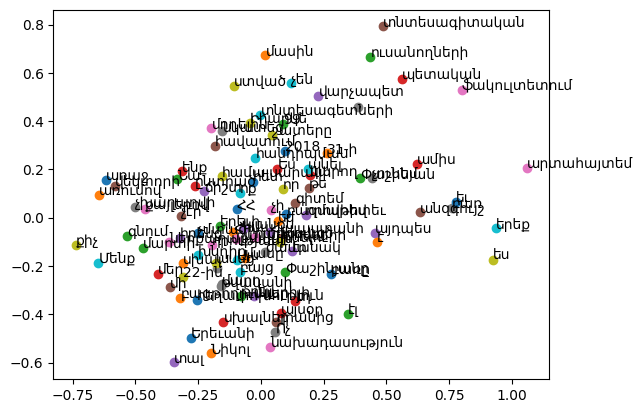

In [34]:
for word in idx2word[:100]:
  coordinates = word_embedding_2d[word]
  plt.scatter(coordinates[0], coordinates[1])
  plt.annotate(word, (coordinates[0], coordinates[1]))